Implementation of Linear Rgression on the boston housing dataset

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = load_diabetes()

In [5]:
dataset = pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
dataset.columns = df.feature_names

In [7]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
# load_diabetes()
X = dataset
y = df.target


In [9]:
#  splitting the data
from sklearn.model_selection import train_test_split
X_train , X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3)

In [10]:
# Standardization process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
X_valid = scaler.transform(X_valid)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
mse = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [14]:
np.mean(mse)

-3083.991475147223

In [20]:
# Prediction
prediction = model.predict(X_valid)
prediction[0:5]

array([112.458697  , 118.3035706 ,  47.69742272, 191.55682762,
       172.57576504])

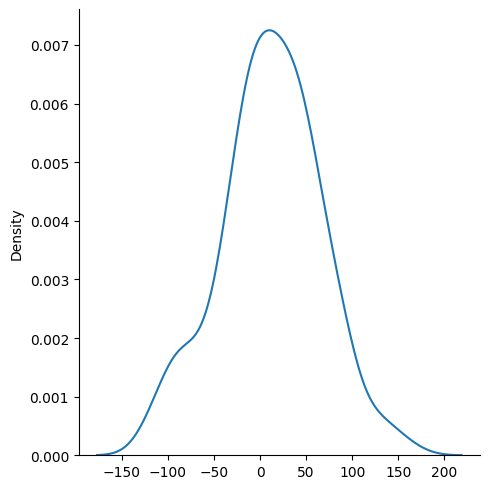

In [22]:
import seaborn as sns
sns.displot(prediction-y_valid,kind='kde')

In [25]:
from sklearn.metrics import r2_score
score = r2_score(prediction,y_valid)
score

0.2425005042201065

In [29]:
coeff = pd.Series(model.coef_, index = X.columns)
intercept = model.intercept_

print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

age    -2.267347
sex   -10.697438
bmi    20.889573
bp     15.731416
s1    -28.424095
s2     15.948660
s3      1.542519
s4      7.935823
s5     33.336766
s6      4.895156
dtype: float64


Intercept:

155.55339805825244


